In [1]:
import pandas as pd
import numpy as np

In [2]:
# uploading csv and checking sample

df = pd.read_csv("train.csv")

In [3]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36488,27,technician,single,secondary,no,235,yes,no,cellular,12,may,13,5,-1,0,unknown,no
28488,58,blue-collar,married,secondary,no,1298,yes,no,cellular,29,jan,522,2,245,4,failure,no
41573,48,management,married,tertiary,no,2351,no,no,cellular,15,sep,150,1,105,3,success,yes
42568,36,services,single,secondary,no,23,yes,no,cellular,28,dec,256,1,-1,0,unknown,no
30426,57,services,married,primary,no,-319,no,yes,cellular,5,feb,620,1,196,1,other,no
2768,44,blue-collar,married,secondary,no,0,yes,no,unknown,14,may,101,2,-1,0,unknown,no
42010,34,admin.,single,tertiary,no,18,yes,yes,cellular,27,oct,114,1,180,1,success,no
29776,58,unemployed,married,primary,no,4967,no,no,telephone,4,feb,176,3,-1,0,unknown,no
3389,40,management,single,tertiary,no,157,yes,no,unknown,15,may,68,2,-1,0,unknown,no
4990,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df.describe

<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact 

In [7]:
print(df.y.nunique(),df.y.unique())

2 ['no' 'yes']


In [8]:
df.y.value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [9]:
print(df.poutcome.nunique(),df.poutcome.unique())

4 ['unknown' 'failure' 'other' 'success']


In [10]:
# picking up columns which are numeric only

numerics = ['int64','float64']
numlist = df.select_dtypes(include=numerics).columns
numlist

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [11]:
# checking null in numlist

for i in numlist:
    n = df[i].isnull().sum()/df.shape[0]
    print(n)

0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [12]:
# picking up columns which are string/categorical only

strings = ['object']
strlist = df.select_dtypes(include=strings).columns
strlist

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [13]:
# checking null in strlist

for i in strlist:
    n = df[i].isnull().sum()/df.shape[0]
    print(n)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [14]:
# checking unique values in strlist columns

for i in strlist:
    print(i,df[i].nunique(),df[i].unique())

job 12 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital 3 ['married' 'single' 'divorced']
education 4 ['tertiary' 'secondary' 'unknown' 'primary']
default 2 ['no' 'yes']
housing 2 ['yes' 'no']
loan 2 ['no' 'yes']
contact 3 ['unknown' 'cellular' 'telephone']
month 12 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome 4 ['unknown' 'failure' 'other' 'success']
y 2 ['no' 'yes']


In [15]:
df.groupby('job').poutcome.describe()

,count,unique,top,freq
job,,,,
admin.,5171,4,unknown,4083
blue-collar,9732,4,unknown,8115
entrepreneur,1487,4,unknown,1262
housemaid,1240,4,unknown,1088
management,9458,4,unknown,7634
retired,2264,4,unknown,1777
self-employed,1579,4,unknown,1298
services,4154,4,unknown,3448
student,938,4,unknown,653


In [16]:
pd.crosstab(df.job, df.poutcome)

poutcome,failure,other,success,unknown
job,,,,
admin.,643,241,204,4083
blue-collar,1068,401,148,8115
entrepreneur,164,39,22,1262
housemaid,97,26,29,1088
management,1044,393,387,7634
retired,230,83,174,1777
self-employed,165,61,55,1298
services,444,177,85,3448
student,117,81,87,653


In [17]:
for i in df.poutcome.unique():
    print(i,(df[(df.poutcome == i) & (df.y == 'yes')].shape[0]/df.shape[0])*100)

unknown 7.489327818451262
failure 1.3669239786777554
other 0.6790382871425096
success 2.163190374024021


In [18]:
import matplotlib.pyplot as plt

In [19]:
df_numlist = df[numlist]
df_numlist.sample(10)

,age,balance,day,duration,campaign,pdays,previous
483,43,0,6,187,1,-1,0
38279,23,567,15,358,1,-1,0
29034,42,46,2,1013,1,-1,0
31478,44,5780,1,525,2,-1,0
23390,37,5065,27,23,19,-1,0
43380,23,488,30,236,1,92,2
20619,40,1694,12,473,6,-1,0
26746,31,148,20,1145,4,-1,0
35600,27,-584,7,411,2,-1,0
5577,32,9,23,98,2,-1,0


In [20]:
df_strlist = df[strlist]
df_strlist.sample(10)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
16195,services,divorced,secondary,no,yes,no,cellular,jul,unknown,no
13323,management,single,tertiary,no,yes,yes,cellular,jul,unknown,no
4295,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
5539,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
3758,retired,divorced,secondary,no,yes,no,unknown,may,unknown,no
4335,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
43103,housemaid,married,primary,no,no,no,cellular,feb,failure,yes
10904,housemaid,married,primary,no,yes,yes,unknown,jun,unknown,no
37755,technician,divorced,secondary,no,yes,no,cellular,may,failure,no
1706,blue-collar,single,secondary,no,yes,yes,unknown,may,unknown,no


(array([3.83770528e-03, 3.37436556e-02, 3.71275006e-02, 2.30233592e-02,
        2.02973245e-02, 9.51383226e-03, 1.08294528e-03, 8.70377770e-04,
        3.33213932e-04, 4.02154745e-05]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

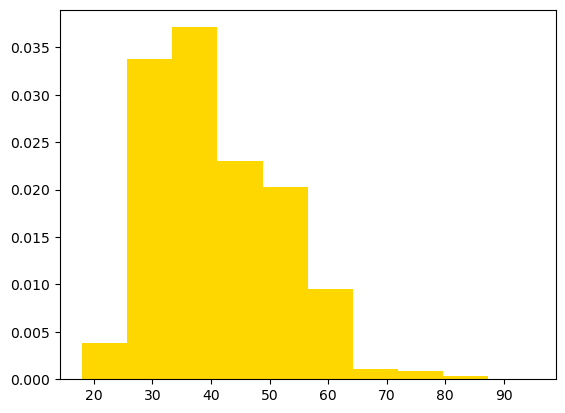

In [21]:
plt.hist(df_numlist.age,density=True,color="gold",label="Not")

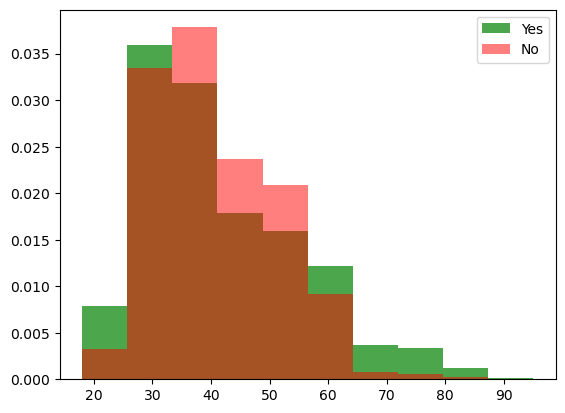

In [22]:
plt.hist(df[df.y == 'yes'].age,density=True,color="green",label="Yes",alpha=0.7)
plt.hist(df[df.y == 'no'].age,density=True,color="red",label="No",alpha=0.5)

plt.legend()

plt.show()

In [118]:
df_work = df
df_work.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age_cat,age_deciles,y_bool,balance_deciles,duration_deciles
5293,32,management,single,tertiary,no,3050,yes,no,unknown,23,...,1,-1,0,unknown,no,0,"(29.0, 32.0]",0,"(1859.0, 3574.0]","(280.0, 368.0]"
16000,30,entrepreneur,married,secondary,no,-346,yes,yes,cellular,22,...,1,-1,0,unknown,no,0,"(29.0, 32.0]",0,"(-8019.001, 0.0]","(58.0, 89.0]"
19847,33,technician,single,secondary,no,671,no,no,cellular,8,...,2,-1,0,unknown,no,0,"(32.0, 34.0]",0,"(448.0, 701.0]","(-0.001, 58.0]"
215,40,technician,married,tertiary,no,483,yes,no,unknown,5,...,1,-1,0,unknown,no,0,"(39.0, 42.0]",0,"(448.0, 701.0]","(147.0, 180.0]"
36101,31,technician,single,secondary,no,550,yes,yes,telephone,11,...,1,-1,0,unknown,no,0,"(29.0, 32.0]",0,"(448.0, 701.0]","(223.0, 280.0]"
23928,30,management,single,tertiary,no,3849,no,no,telephone,29,...,2,-1,0,unknown,no,0,"(29.0, 32.0]",0,"(3574.0, 102127.0]","(89.0, 117.0]"
2264,47,self-employed,divorced,secondary,no,218,yes,no,unknown,12,...,7,-1,0,unknown,no,0,"(46.0, 51.0]",0,"(131.0, 272.0]","(-0.001, 58.0]"
8795,25,management,single,tertiary,no,493,yes,no,unknown,4,...,1,-1,0,unknown,no,1,"(17.999, 29.0]",0,"(448.0, 701.0]","(280.0, 368.0]"
10264,47,management,single,tertiary,no,0,no,no,unknown,11,...,3,-1,0,unknown,no,0,"(46.0, 51.0]",0,"(-8019.001, 0.0]","(-0.001, 58.0]"
23789,49,services,married,secondary,no,413,yes,yes,cellular,29,...,2,-1,0,unknown,no,0,"(46.0, 51.0]",0,"(272.0, 448.0]","(147.0, 180.0]"


In [119]:
# changing y from yes and no to Y_bool 1 and 0 respectively

df_work['y_bool'] = np.where(df_work.y == 'yes',1,0)
df_work.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age_cat,age_deciles,y_bool,balance_deciles,duration_deciles
43947,34,management,married,tertiary,no,3301,yes,no,cellular,17,...,2,227,4,failure,yes,0,"(32.0, 34.0]",1,"(1859.0, 3574.0]","(368.0, 548.0]"
31976,42,blue-collar,married,primary,no,7735,yes,no,cellular,13,...,1,144,2,failure,no,0,"(39.0, 42.0]",0,"(3574.0, 102127.0]","(147.0, 180.0]"
30405,29,services,single,secondary,no,612,no,no,cellular,5,...,1,198,5,other,no,1,"(17.999, 29.0]",0,"(448.0, 701.0]","(-0.001, 58.0]"
42017,30,management,single,tertiary,no,16935,no,no,cellular,28,...,1,-1,0,unknown,no,0,"(29.0, 32.0]",0,"(3574.0, 102127.0]","(89.0, 117.0]"
25665,32,management,married,tertiary,no,1923,no,no,cellular,19,...,1,-1,0,unknown,no,0,"(29.0, 32.0]",0,"(1859.0, 3574.0]","(58.0, 89.0]"


In [120]:
# based on the hist plot above we concluded age categorical 1:less than 25 || 2:25 to 65 || 3:65 above 

df_work['age_cat'] = np.where(df_work.age < 25,1,np.where((df_work.age >= 25) & (df_work.age <= 65),2,3))
df_work.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age_cat,age_deciles,y_bool,balance_deciles,duration_deciles
27781,29,admin.,single,tertiary,no,8,no,no,cellular,28,...,1,-1,0,unknown,no,2,"(17.999, 29.0]",0,"(0.0, 22.0]","(368.0, 548.0]"
28034,52,management,married,tertiary,no,1392,no,no,cellular,28,...,2,205,3,failure,no,2,"(51.0, 56.0]",0,"(1126.0, 1859.0]","(548.0, 4918.0]"
42081,87,retired,married,primary,no,230,no,no,cellular,30,...,1,-1,0,unknown,yes,3,"(56.0, 95.0]",1,"(131.0, 272.0]","(117.0, 147.0]"
26189,54,entrepreneur,divorced,tertiary,no,20527,no,no,telephone,20,...,1,-1,0,unknown,no,2,"(51.0, 56.0]",0,"(3574.0, 102127.0]","(58.0, 89.0]"
37439,29,blue-collar,single,secondary,no,1550,yes,yes,cellular,13,...,3,-1,0,unknown,no,2,"(17.999, 29.0]",0,"(1126.0, 1859.0]","(223.0, 280.0]"
30464,37,blue-collar,married,secondary,no,660,yes,yes,cellular,5,...,4,-1,0,unknown,no,2,"(36.0, 39.0]",0,"(448.0, 701.0]","(368.0, 548.0]"
6695,31,admin.,married,secondary,no,728,yes,yes,unknown,28,...,4,-1,0,unknown,no,2,"(29.0, 32.0]",0,"(701.0, 1126.0]","(89.0, 117.0]"
1005,30,services,single,secondary,no,342,yes,no,unknown,7,...,2,-1,0,unknown,no,2,"(29.0, 32.0]",0,"(272.0, 448.0]","(180.0, 223.0]"
14883,35,blue-collar,married,secondary,no,975,yes,no,cellular,16,...,1,-1,0,unknown,no,2,"(34.0, 36.0]",0,"(701.0, 1126.0]","(89.0, 117.0]"
25073,37,management,married,primary,no,5427,no,no,cellular,18,...,1,159,1,failure,no,2,"(36.0, 39.0]",0,"(3574.0, 102127.0]","(180.0, 223.0]"


In [121]:
# to recheck mapping

df_work.groupby('age_cat').agg({'age':['min','max','count']})

age           
        min max  count
age_cat               
1        18  24    809
2        25  65  43651
3        66  95    751

In [122]:
df_work['age_deciles'] = pd.qcut(df_work.age,10)
df_work.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age_cat,age_deciles,y_bool,balance_deciles,duration_deciles
23592,46,technician,single,tertiary,no,568,no,no,telephone,28,...,4,-1,0,unknown,no,2,"(42.0, 46.0]",0,"(448.0, 701.0]","(-0.001, 58.0]"
40135,26,services,single,secondary,no,2158,yes,yes,telephone,5,...,1,-1,0,unknown,no,2,"(17.999, 29.0]",0,"(1859.0, 3574.0]","(223.0, 280.0]"
30253,33,management,single,tertiary,no,7114,yes,no,cellular,5,...,2,233,3,other,no,2,"(32.0, 34.0]",0,"(3574.0, 102127.0]","(223.0, 280.0]"
33200,50,entrepreneur,married,tertiary,no,221,yes,no,cellular,20,...,2,340,1,failure,no,2,"(46.0, 51.0]",0,"(131.0, 272.0]","(280.0, 368.0]"
15482,31,entrepreneur,single,secondary,no,379,yes,no,cellular,18,...,2,-1,0,unknown,no,2,"(29.0, 32.0]",0,"(272.0, 448.0]","(548.0, 4918.0]"
18125,55,self-employed,married,primary,no,2349,no,yes,telephone,30,...,3,-1,0,unknown,no,2,"(51.0, 56.0]",0,"(1859.0, 3574.0]","(280.0, 368.0]"
17233,52,housemaid,married,secondary,no,-12,no,yes,cellular,28,...,5,-1,0,unknown,no,2,"(51.0, 56.0]",0,"(-8019.001, 0.0]","(117.0, 147.0]"
20917,32,management,married,tertiary,no,1517,no,no,cellular,13,...,3,-1,0,unknown,no,2,"(29.0, 32.0]",0,"(1126.0, 1859.0]","(180.0, 223.0]"
40768,26,student,single,secondary,no,1608,no,no,cellular,10,...,2,102,2,success,no,2,"(17.999, 29.0]",0,"(1126.0, 1859.0]","(58.0, 89.0]"
17253,48,self-employed,married,tertiary,no,147,no,yes,cellular,28,...,4,-1,0,unknown,no,2,"(46.0, 51.0]",0,"(131.0, 272.0]","(280.0, 368.0]"


In [52]:
# dividing cont var age into deciles and checking campaign target rate

age_df = df_work.groupby('age_deciles').agg({'y_bool':['sum','count']})
age_df = age_df.xs('y_bool',axis=1,drop_level=True)
age_df

,sum,count
age_deciles,,
"(17.999, 29.0]",928,5273
"(29.0, 32.0]",644,5838
"(32.0, 34.0]",408,3902
"(34.0, 36.0]",404,3700
"(36.0, 39.0]",457,4649
"(39.0, 42.0]",347,3888
"(42.0, 46.0]",420,4688
"(46.0, 51.0]",445,4954
"(51.0, 56.0]",398,4197


In [ ]:
age_df.to_csv(r'C:\Users\soft_demolition\Desktop\Banking Term Deposit\age_df.csv', index=False, header=True)

In [123]:
# manual category selection is not giving us desired results hence using decile approach to bin age, 29-56 age=0, rest 1

df_work['age_cat'] = np.where((df_work.age > 29) & (df_work.age <= 56),0,1)
df_work.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age_cat,age_deciles,y_bool,balance_deciles,duration_deciles
34218,42,admin.,single,secondary,no,1451,yes,no,cellular,4,...,4,-1,0,unknown,yes,0,"(39.0, 42.0]",1,"(1126.0, 1859.0]","(223.0, 280.0]"
23384,53,technician,divorced,secondary,no,28,no,no,cellular,27,...,9,-1,0,unknown,no,0,"(51.0, 56.0]",0,"(22.0, 131.0]","(280.0, 368.0]"
22938,46,admin.,married,secondary,no,22,no,no,cellular,26,...,6,-1,0,unknown,yes,0,"(42.0, 46.0]",1,"(0.0, 22.0]","(368.0, 548.0]"
42423,38,services,married,secondary,no,5000,no,no,cellular,4,...,5,536,5,failure,no,0,"(36.0, 39.0]",0,"(3574.0, 102127.0]","(548.0, 4918.0]"
38924,24,technician,single,secondary,no,135,yes,yes,cellular,18,...,1,-1,0,unknown,no,1,"(17.999, 29.0]",0,"(131.0, 272.0]","(223.0, 280.0]"
37292,37,blue-collar,married,secondary,no,0,yes,no,cellular,13,...,1,300,1,failure,no,0,"(36.0, 39.0]",0,"(-8019.001, 0.0]","(-0.001, 58.0]"
10812,57,retired,married,primary,no,7938,no,no,unknown,17,...,1,-1,0,unknown,no,1,"(56.0, 95.0]",0,"(3574.0, 102127.0]","(117.0, 147.0]"
4055,37,entrepreneur,single,secondary,no,654,no,no,unknown,19,...,2,-1,0,unknown,no,0,"(36.0, 39.0]",0,"(448.0, 701.0]","(548.0, 4918.0]"
43440,73,retired,divorced,secondary,no,7111,yes,no,cellular,12,...,1,182,1,success,no,1,"(56.0, 95.0]",0,"(3574.0, 102127.0]","(280.0, 368.0]"
17442,27,entrepreneur,married,tertiary,no,59,no,no,cellular,28,...,6,-1,0,unknown,no,1,"(17.999, 29.0]",0,"(22.0, 131.0]","(280.0, 368.0]"


In [54]:
df_work.groupby('age_cat').agg({'age':['min','max']})

age    
        min max
age_cat        
0        30  56
1        18  95

In [55]:
age_df.columns

Index(['sum', 'count'], dtype='object')

In [43]:
# age_df['hit_rate'] = (age_df.sum/age_df.count)*100
age_df

<bound method NDFrame._add_numeric_operations.<locals>.sum of                 sum  count
age_deciles               
(17.999, 29.0]  928   5273
(29.0, 32.0]    644   5838
(32.0, 34.0]    408   3902
(34.0, 36.0]    404   3700
(36.0, 39.0]    457   4649
(39.0, 42.0]    347   3888
(42.0, 46.0]    420   4688
(46.0, 51.0]    445   4954
(51.0, 56.0]    398   4197
(56.0, 95.0]    838   4122>

In [124]:
# we will transform y responses i.e yes or no to 1 and 0 respectively

df_work['y_bool'] = np.where(df.y == 'yes',1,0)
df_work.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age_cat,age_deciles,y_bool,balance_deciles,duration_deciles
14046,37,blue-collar,single,secondary,no,1672,yes,no,cellular,11,...,1,-1,0,unknown,no,0,"(36.0, 39.0]",0,"(1126.0, 1859.0]","(368.0, 548.0]"
10888,35,blue-collar,single,secondary,no,507,no,no,unknown,17,...,6,-1,0,unknown,no,0,"(34.0, 36.0]",0,"(448.0, 701.0]","(-0.001, 58.0]"
27191,58,management,married,tertiary,no,96,no,no,cellular,21,...,1,-1,0,unknown,yes,1,"(56.0, 95.0]",1,"(22.0, 131.0]","(548.0, 4918.0]"
5593,30,blue-collar,single,secondary,yes,4,yes,no,unknown,23,...,3,-1,0,unknown,no,0,"(29.0, 32.0]",0,"(0.0, 22.0]","(58.0, 89.0]"
26708,54,management,divorced,tertiary,no,6410,no,no,cellular,20,...,2,-1,0,unknown,no,0,"(51.0, 56.0]",0,"(3574.0, 102127.0]","(89.0, 117.0]"
26651,57,self-employed,married,tertiary,no,3012,no,no,telephone,20,...,4,-1,0,unknown,no,1,"(56.0, 95.0]",0,"(1859.0, 3574.0]","(89.0, 117.0]"
3394,46,management,married,tertiary,no,1038,yes,yes,unknown,15,...,3,-1,0,unknown,no,0,"(42.0, 46.0]",0,"(701.0, 1126.0]","(180.0, 223.0]"
18322,57,management,married,tertiary,no,179,no,no,cellular,31,...,2,-1,0,unknown,no,1,"(56.0, 95.0]",0,"(131.0, 272.0]","(180.0, 223.0]"
38180,26,services,married,secondary,no,77,yes,no,cellular,15,...,1,340,4,failure,yes,1,"(17.999, 29.0]",1,"(22.0, 131.0]","(548.0, 4918.0]"
10586,40,blue-collar,married,secondary,no,876,no,no,unknown,16,...,1,-1,0,unknown,no,0,"(39.0, 42.0]",0,"(701.0, 1126.0]","(180.0, 223.0]"


In [57]:
# calculating hit rate/target rate i.e y==1 for each age category

for i in df_work.age_cat.unique():
    print('Age Category' + str(i),(df_work[(df_work.age_cat == i) & (df_work.y_bool == 1)].shape[0]/df_work.shape[0])*100)

Age Category1 3.906129039393068
Age Category0 7.79235141890248


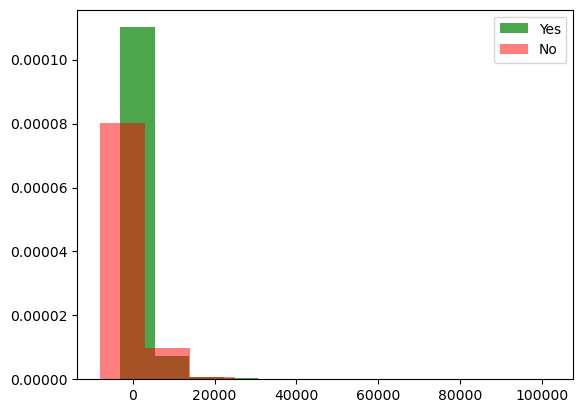

In [58]:
# now checking balance vs y

plt.hist(df_work[df_work.y_bool == 1].balance,density=True,color="green",label="Yes",alpha=0.7)
plt.hist(df_work[df_work.y_bool == 0].balance,density=True,color="red",label="No",alpha=0.5)

plt.legend()

plt.show()

In [59]:
df_work.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [60]:
df_work.where(df_work.balance <= 0).count()

age            7280
job            7280
marital        7280
education      7280
default        7280
balance        7280
housing        7280
loan           7280
contact        7280
day            7280
month          7280
duration       7280
campaign       7280
pdays          7280
previous       7280
poutcome       7280
y              7280
age_cat        7280
age_deciles    7280
y_bool         7280
dtype: int64

In [61]:
df_work.where((df_work.balance <= 0) & (df_work.y_bool == 1)).count()

age            502
job            502
marital        502
education      502
default        502
balance        502
housing        502
loan           502
contact        502
day            502
month          502
duration       502
campaign       502
pdays          502
previous       502
poutcome       502
y              502
age_cat        502
age_deciles    502
y_bool         502
dtype: int64

In [63]:
xrange = np.linspace(df_work.balance.min(),df_work.balance.max(),100)
print(xrange)
# for x in xrange:
#      print(x,df_work[df_work.balance < x & df_work.y_bool == 1].shape[0])

[ -8019.          -6906.41414141  -5793.82828283  -4681.24242424
  -3568.65656566  -2456.07070707  -1343.48484848   -230.8989899
    881.68686869   1994.27272727   3106.85858586   4219.44444444
   5332.03030303   6444.61616162   7557.2020202    8669.78787879
   9782.37373737  10894.95959596  12007.54545455  13120.13131313
  14232.71717172  15345.3030303   16457.88888889  17570.47474747
  18683.06060606  19795.64646465  20908.23232323  22020.81818182
  23133.4040404   24245.98989899  25358.57575758  26471.16161616
  27583.74747475  28696.33333333  29808.91919192  30921.50505051
  32034.09090909  33146.67676768  34259.26262626  35371.84848485
  36484.43434343  37597.02020202  38709.60606061  39822.19191919
  40934.77777778  42047.36363636  43159.94949495  44272.53535354
  45385.12121212  46497.70707071  47610.29292929  48722.87878788
  49835.46464646  50948.05050505  52060.63636364  53173.22222222
  54285.80808081  55398.39393939  56510.97979798  57623.56565657
  58736.15151515  59848.73

In [125]:
df_work['balance_deciles'] = pd.qcut(df_work.balance,10)
df_work.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age_cat,age_deciles,y_bool,balance_deciles,duration_deciles
6769,29,management,single,tertiary,no,-158,yes,no,unknown,28,...,1,-1,0,unknown,no,1,"(17.999, 29.0]",0,"(-8019.001, 0.0]","(368.0, 548.0]"
3738,51,blue-collar,married,primary,no,196,yes,no,unknown,16,...,1,-1,0,unknown,no,0,"(46.0, 51.0]",0,"(131.0, 272.0]","(223.0, 280.0]"
8169,52,blue-collar,married,secondary,no,185,yes,no,unknown,2,...,3,-1,0,unknown,no,0,"(51.0, 56.0]",0,"(131.0, 272.0]","(117.0, 147.0]"
39743,25,technician,married,secondary,no,517,no,no,cellular,28,...,3,-1,0,unknown,no,1,"(17.999, 29.0]",0,"(448.0, 701.0]","(117.0, 147.0]"
32116,30,blue-collar,single,secondary,no,4,no,no,cellular,15,...,1,-1,0,unknown,no,0,"(29.0, 32.0]",0,"(0.0, 22.0]","(548.0, 4918.0]"
18447,30,services,married,secondary,no,48,yes,no,cellular,31,...,13,-1,0,unknown,yes,0,"(29.0, 32.0]",1,"(22.0, 131.0]","(548.0, 4918.0]"
36587,38,blue-collar,divorced,secondary,no,-90,no,yes,cellular,12,...,1,-1,0,unknown,no,0,"(36.0, 39.0]",0,"(-8019.001, 0.0]","(223.0, 280.0]"
43148,59,technician,married,secondary,no,7766,yes,no,cellular,25,...,1,461,1,failure,yes,1,"(56.0, 95.0]",1,"(3574.0, 102127.0]","(548.0, 4918.0]"
16941,35,management,single,tertiary,no,48,yes,yes,cellular,25,...,1,-1,0,unknown,no,0,"(34.0, 36.0]",0,"(22.0, 131.0]","(223.0, 280.0]"
7199,35,blue-collar,married,secondary,no,809,yes,yes,unknown,29,...,1,-1,0,unknown,no,0,"(34.0, 36.0]",0,"(701.0, 1126.0]","(58.0, 89.0]"


In [65]:
# dividing cont var balance into deciles and checking campaign target rate

balance_df = df_work.groupby('balance_deciles').agg({'y_bool':['sum','count']})
balance_df = balance_df.xs('y_bool',axis=1,drop_level=True)
balance_df

,sum,count
balance_deciles,,
"(-8019.001, 0.0]",502,7280
"(0.0, 22.0]",128,1773
"(22.0, 131.0]",417,4544
"(131.0, 272.0]",489,4516
"(272.0, 448.0]",513,4495
"(448.0, 701.0]",543,4522
"(701.0, 1126.0]",574,4526
"(1126.0, 1859.0]",643,4513
"(1859.0, 3574.0]",751,4521


In [70]:
# from balance deciles sheet, monotonicity is found so no cat

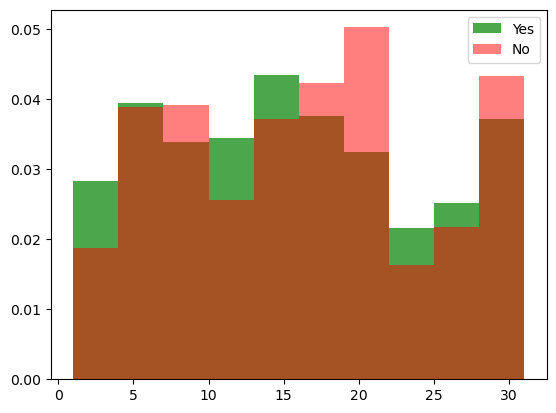

In [71]:
# now checking day vs y

plt.hist(df_work[df_work.y_bool == 1].day,density=True,color="green",label="Yes",alpha=0.7)
plt.hist(df_work[df_work.y_bool == 0].day,density=True,color="red",label="No",alpha=0.5)

plt.legend()

plt.show()

In [109]:
# dividing cat var day into cats and checking campaign target rate

day_df = df_work.groupby('day').agg({'y_bool':['sum','count']})
day_df = day_df.xs('y_bool',axis=1,drop_level=True)
day_df

,sum,count
day,,
1,90,322
2,182,1293
3,178,1079
4,230,1445
5,215,1910
6,181,1932
7,157,1817
8,201,1842
9,179,1561


In [110]:
day_df = day_df.reset_index(col_level=1)
day_df.rename(columns = {'sum':'success','count':'total'}, inplace = True)
day_df

,day,success,total
0,1,90,322
1,2,182,1293
2,3,178,1079
3,4,230,1445
4,5,215,1910
5,6,181,1932
6,7,157,1817
7,8,201,1842
8,9,179,1561
9,10,121,524


In [112]:
day_df['hitrate'] = (day_df.success/day_df.total)*100
day_df

,day,success,total,hitrate
0,1,90,322,27.950311
1,2,182,1293,14.075793
2,3,178,1079,16.496756
3,4,230,1445,15.916955
4,5,215,1910,11.256545
5,6,181,1932,9.368530
6,7,157,1817,8.640616
7,8,201,1842,10.912052
8,9,179,1561,11.467008
9,10,121,524,23.091603


In [113]:
day_df['day_cat'] = np.where(day_df.hitrate < 10,1,np.where(day_df.hitrate > 18,3,2))
day_df

,day,success,total,hitrate,day_cat
0,1,90,322,27.950311,3
1,2,182,1293,14.075793,2
2,3,178,1079,16.496756,2
3,4,230,1445,15.916955,2
4,5,215,1910,11.256545,2
5,6,181,1932,9.368530,1
6,7,157,1817,8.640616,1
7,8,201,1842,10.912052,2
8,9,179,1561,11.467008,2
9,10,121,524,23.091603,3


In [128]:
df_work1 = df_work.merge(day_df[['day','day_cat']],on='day',how='left')
df_work1.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,age_cat,age_deciles,y_bool,balance_deciles,duration_deciles,day_cat
999,33,technician,single,secondary,no,56,no,no,unknown,7,...,-1,0,unknown,no,0,"(32.0, 34.0]",0,"(22.0, 131.0]","(223.0, 280.0]",1
9952,43,blue-collar,married,primary,no,547,no,yes,unknown,9,...,-1,0,unknown,no,0,"(42.0, 46.0]",0,"(448.0, 701.0]","(89.0, 117.0]",2
44741,33,blue-collar,married,secondary,no,983,no,no,unknown,8,...,-1,0,unknown,no,0,"(32.0, 34.0]",0,"(701.0, 1126.0]","(-0.001, 58.0]",2
41585,26,management,single,tertiary,no,362,no,no,cellular,15,...,104,2,success,yes,1,"(17.999, 29.0]",1,"(272.0, 448.0]","(548.0, 4918.0]",2
33378,42,blue-collar,married,primary,no,208,yes,no,cellular,20,...,-1,0,unknown,no,0,"(39.0, 42.0]",0,"(131.0, 272.0]","(58.0, 89.0]",1


In [82]:
print((df_work[(df_work.balance > 0) & (df_work.y_bool == 1)].shape[0]/df_work.shape[0])*100)
print((df_work[(df_work.balance <= 0) & (df_work.y_bool == 1)].shape[0]/df_work.shape[0])*100)

10.588131207007144
1.1103492512884032


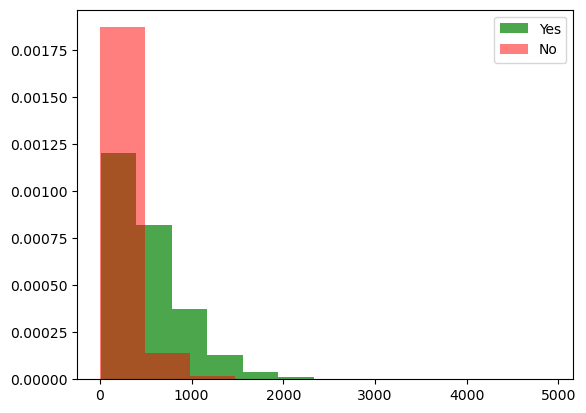

In [83]:
# now checking duration vs y

plt.hist(df_work[df_work.y_bool == 1].duration,density=True,color="green",label="Yes",alpha=0.7)
plt.hist(df_work[df_work.y_bool == 0].duration,density=True,color="red",label="No",alpha=0.5)

plt.legend()

plt.show()

In [84]:
df_work['duration_deciles'] = pd.qcut(df_work.duration,10)
df_work.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age_cat,age_deciles,y_bool,balance_deciles,duration_deciles
29711,55,blue-collar,married,primary,no,781,yes,no,cellular,3,...,3,270,2,failure,no,0,"(51.0, 56.0]",0,"(701.0, 1126.0]","(89.0, 117.0]"
34360,53,management,divorced,tertiary,no,2152,no,no,cellular,4,...,2,80,3,success,no,0,"(51.0, 56.0]",0,"(1859.0, 3574.0]","(368.0, 548.0]"
2546,57,retired,married,tertiary,no,3571,no,no,unknown,13,...,2,-1,0,unknown,no,1,"(56.0, 95.0]",0,"(1859.0, 3574.0]","(548.0, 4918.0]"
36799,50,management,married,primary,no,15035,yes,no,cellular,12,...,1,-1,0,unknown,no,0,"(46.0, 51.0]",0,"(3574.0, 102127.0]","(147.0, 180.0]"
11991,41,management,married,tertiary,no,15,no,no,unknown,20,...,5,-1,0,unknown,no,0,"(39.0, 42.0]",0,"(0.0, 22.0]","(-0.001, 58.0]"


In [85]:
# dividing cont var duration into cats and checking campaign target rate

duration_df = df_work.groupby('duration_deciles').agg({'y_bool':['sum','count']})
duration_df = duration_df.xs('y_bool',axis=1,drop_level=True)
duration_df

,sum,count
duration_deciles,,
"(-0.001, 58.0]",9,4529
"(58.0, 89.0]",57,4576
"(89.0, 117.0]",128,4495
"(117.0, 147.0]",209,4564
"(147.0, 180.0]",306,4496
"(180.0, 223.0]",410,4531
"(223.0, 280.0]",557,4517
"(280.0, 368.0]",616,4468
"(368.0, 548.0]",944,4527


In [ ]:
# duration no category, leave it upto algorithm

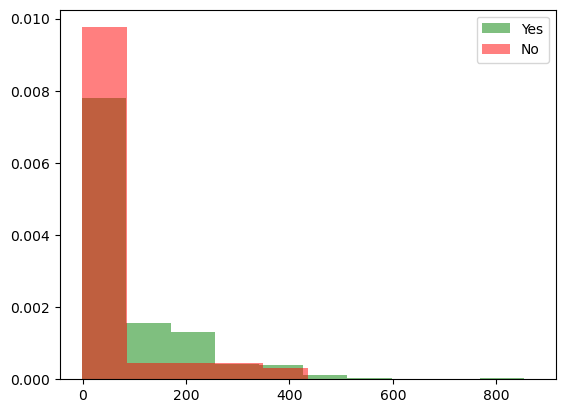

In [91]:
# now checking pdays vs y

plt.hist(df_work[df_work.y_bool == 1].pdays,density=True,color="green",label="Yes",alpha=0.5)
plt.hist(df_work[df_work.y_bool == 0].pdays,density=True,color="red",label="No",alpha=0.5)

plt.legend()

plt.show()

In [98]:
df_work[(df_work.pdays == -1) & (df_work.y_bool == 1)].shape[0]

3384

In [99]:
df_work[(df_work.pdays == 0)].shape[0]

0

In [130]:
df_work1[(df_work1.pdays == -1) & (df_work1.y_bool == 1)].shape[0]/df_work1.shape[0]

0.07484904116254894

In [131]:
df_work1['pdays'] = df_work1.pdays.replace(-1,0)
df_work1.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,age_cat,age_deciles,y_bool,balance_deciles,duration_deciles,day_cat
1652,42,blue-collar,married,secondary,no,117,yes,no,unknown,9,...,0,0,unknown,no,0,"(39.0, 42.0]",0,"(22.0, 131.0]","(117.0, 147.0]",2
20308,57,retired,married,secondary,no,13834,no,no,cellular,11,...,0,0,unknown,no,1,"(56.0, 95.0]",0,"(3574.0, 102127.0]","(89.0, 117.0]",2
33597,43,blue-collar,married,secondary,no,2374,no,no,cellular,20,...,264,2,failure,no,0,"(42.0, 46.0]",0,"(1859.0, 3574.0]","(280.0, 368.0]",1
28537,30,management,married,tertiary,no,350,no,no,cellular,29,...,0,0,unknown,no,0,"(29.0, 32.0]",0,"(272.0, 448.0]","(280.0, 368.0]",1
44820,23,self-employed,single,tertiary,no,780,no,no,cellular,16,...,183,3,success,yes,1,"(17.999, 29.0]",1,"(701.0, 1126.0]","(368.0, 548.0]",2


In [135]:
df_work1.pdays.describe()

count    45211.000000
mean        41.015195
std         99.792615
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        871.000000
Name: pdays, dtype: float64

In [137]:
df_work1[df_work1.pdays > 0].pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [138]:
df_work1['pdays_gt0_deciles'] = pd.qcut(df_work1[df_work1.pdays > 0].pdays,10)
pdays_df = df_work1.groupby('pdays_gt0_deciles').agg({'y_bool':['sum','count']})
pdays_df = pdays_df.xs('y_bool',axis=1,drop_level=True)
pdays_df = pdays_df.reset_index(col_level=1)
pdays_df.rename(columns = {'sum':'success','count':'total'}, inplace = True)
pdays_df['hitrate'] = (pdays_df.success/pdays_df.total)*100
pdays_df

,pdays_gt0_deciles,success,total,hitrate
0,"(0.999, 91.0]",326,844,38.625592
1,"(91.0, 108.0]",356,817,43.574051
2,"(108.0, 159.0]",132,819,16.117216
3,"(159.0, 181.0]",191,835,22.874251
4,"(181.0, 194.0]",316,814,38.820639
5,"(194.0, 258.0]",123,833,14.765906
6,"(258.0, 300.0]",119,825,14.424242
7,"(300.0, 343.0]",85,879,9.670080
8,"(343.0, 362.4]",58,765,7.581699
9,"(362.4, 871.0]",199,826,24.092010


In [139]:
# PDAYS : no clear trend in hitrate bcoz no monotonicity & max pdays have 0 value almost 95%

In [136]:
print(df_work[(df_work1.pdays == 0) & (df_work1.y_bool == 1)].shape[0]/df_work1.shape[0],df_work[(df_work1.pdays > 0) & (df_work1.y_bool == 1)].shape[0]/df_work1.shape[0])

0.07484904116254894 0.042135763420406536


In [142]:
for i in df_work1.job.unique():
    print(i,(df_work1[(df_work1.job == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

management 2.8776182787374753
technician 1.857954922474619
entrepreneur 0.27205768507664063
blue-collar 1.565990577514322
unknown 0.07520293733825838
retired 1.1413151666629804
admin. 1.3956780429541482
services 0.8161730552299219
self-employed 0.4136161553604211
unemployed 0.44679392183318223
housemaid 0.24109176970206364
student 0.5949879454115149


In [143]:
for i in df_work1.job.unique():
    print(i,(df_work1[(df_work1.job == i) & (df_work1.y_bool == 0)].shape[0]/df.shape[0])*100)

management 18.04206940788746
technician 14.945477870429762
entrepreneur 3.0169648979230717
blue-collar 19.95974431001305
unknown 0.5618101789387538
retired 3.8663157196257547
admin. 10.04180398575568
services 8.371856406626705
self-employed 3.078896728672226
unemployed 2.4352480591006613
housemaid 2.5016035920461834
student 1.479728384685143


In [149]:
for i in df_work1.marital.unique():
    print(i,(df_work1[(df_work1.marital == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

married 6.093649775497114
single 4.229059299727942
divorced 1.3757713830704918


In [147]:
# converting marital to categorical, divorced=0 else =1

In [151]:
df_work1['marital_cat'] = np.where(df_work1.marital == 'divorced',0,1)
df_work1.groupby('marital_cat').agg({'y_bool':'count'})

,y_bool
marital_cat,
0,5207
1,40004


In [152]:
for i in df_work1.education.unique():
    print(i,(df_work1[(df_work1.education == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

tertiary 4.414854791975404
secondary 5.419035190550972
unknown 0.5573864767423856
primary 1.3072039990267854


In [153]:
# converting education to categorical, tertiary and secondary = 1 ; unknown and primary = 0

In [154]:
df_work1['education_cat'] = np.where((df_work1.education == 'tertiary') | (df_work1.education == 'secondary'),1,0)
df_work1.groupby('education_cat').agg({'y_bool':'count'})

,y_bool
education_cat,
0,8708
1,36503


In [155]:
for i in df_work1.default.unique():
    print(i,(df_work1[(df_work1.default == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

no 11.583464201189976
yes 0.11501625710557166


In [156]:
# converting default to categorical, no=1 ; yes=0

In [157]:
df_work1['default_cat'] = np.where(df_work1.default == 'no',1,0)
df_work1.groupby('default_cat').agg({'y_bool':'count'})

,y_bool
default_cat,
0,815
1,44396


In [158]:
for i in df_work1.housing.unique():
    print(i,(df_work1[(df_work1.housing == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

yes 4.279931874986175
no 7.418548583309372


In [167]:
# converting housing to categorical, yes=0 ; no=1

df_work1['housing_cat'] = np.where(df_work1.housing == 'no',1,0)
df_work1.groupby('housing_cat').agg({'y_bool':'count'})

,y_bool
housing_cat,
0,25130
1,20081


In [159]:
for i in df_work1.loan.unique():
    print(i,(df_work1[(df_work1.loan == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

no 10.627944526774458
yes 1.07053593152109


In [160]:
# converting loan to categorical, no=1 ; yes=0

In [161]:
df_work1['loan_cat'] = np.where(df_work1.loan == 'no',1,0)
df_work1.groupby('loan_cat').agg({'y_bool':'count'})

,y_bool
loan_cat,
0,7244
1,37967


In [162]:
# contact

for i in df_work1.contact.unique():
    print(i,(df_work1[(df_work1.contact == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

unknown 1.172281082037557
cellular 9.663577447966203
telephone 0.8626219282917874


In [163]:
# converting contact to categorical, cellular=1 ; else=0

In [164]:
df_work1['contact_cat'] = np.where(df_work1.contact == 'cellular',1,0)
df_work1.groupby('contact_cat').agg({'y_bool':'count'})

,y_bool
contact_cat,
0,15926
1,29285


In [165]:
# month

for i in df_work1.month.unique():
    print(i,(df_work1[(df_work1.month == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

may 2.0459622658202647
jun 1.2076706996085023
jul 1.386830638561412
aug 1.5217535555506403
oct 0.7144279047134547
nov 0.8913759925681802
dec 0.22118510981840703
jan 0.314082855942138
feb 0.975426334299175
mar 0.5485390723496494
apr 1.2762380836522085
sep 0.5949879454115149


In [166]:
# campaign

for i in df_work1.campaign.unique():
    print(i,(df_work1[(df_work1.campaign == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

1 5.664550662449404
2 3.0988033885558828
3 1.3669239786777554
5 0.3074473026475858
4 0.7011567981243503
6 0.20349030103293447
7 0.1039570016146513
8 0.07077923514189025
9 0.04644887306186547
10 0.030965915374576984
11 0.03538961757094512
12 0.00884740439273628
13 0.013271106589104421
19 0.0
14 0.00884740439273628
24 0.00221185109818407
16 0.00442370219636814
32 0.00221185109818407
18 0.0
22 0.0
15 0.00884740439273628
17 0.013271106589104421
25 0.0
21 0.00221185109818407
43 0.0
51 0.0
63 0.0
41 0.0
26 0.0
28 0.0
55 0.0
50 0.0
38 0.0
23 0.0
20 0.00221185109818407
29 0.00221185109818407
31 0.0
37 0.0
30 0.0
46 0.0
27 0.0
58 0.0
33 0.0
35 0.0
34 0.0
36 0.0
39 0.0
44 0.0


In [169]:
df_work1.campaign.value_counts(normalize=True)

campaign
1     0.388047
2     0.276592
3     0.122116
4     0.077901
5     0.039017
6     0.028555
7     0.016257
8     0.011944
9     0.007233
10    0.005884
11    0.004446
12    0.003428
13    0.002942
14    0.002057
15    0.001858
16    0.001747
17    0.001526
18    0.001128
19    0.000973
20    0.000951
21    0.000774
22    0.000509
25    0.000487
23    0.000487
24    0.000442
29    0.000354
28    0.000354
26    0.000288
31    0.000265
27    0.000221
32    0.000199
30    0.000177
33    0.000133
34    0.000111
36    0.000088
35    0.000088
43    0.000066
38    0.000066
37    0.000044
50    0.000044
41    0.000044
46    0.000022
58    0.000022
55    0.000022
63    0.000022
51    0.000022
39    0.000022
44    0.000022
Name: proportion, dtype: float64

In [170]:
# converting campaign to categorical: campaign_cat1 => 1,2&3 = 1, else=0 || campaign_cat2 => 1,2=1 , else=0

df_work1['campaign_cat1'] = np.where(df_work1.campaign <= 3,1,0)
df_work1['campaign_cat2'] = np.where(df_work1.campaign <= 2,1,0)


In [175]:
for i in df_work1.campaign_cat2.unique():
    print(i,df_work1[df_work1.campaign_cat2 == i].shape[0],(df_work1[(df_work1.campaign_cat2 == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

1 30049 8.763354051005285
0 15162 2.9351264072902614


In [176]:
for i in df_work1.campaign_cat1.unique():
    print(i,df_work1[df_work1.campaign_cat1 == i].shape[0],(df_work1[(df_work1.campaign_cat1 == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

1 35570 10.130278029683042
0 9641 1.5682024286125058


In [178]:
# poutcome

for i in df_work1.poutcome.unique():
    print(i,df_work1[df_work1.poutcome == i].shape[0],(df_work1[(df_work1.poutcome == i) & (df_work1.y_bool == 1)].shape[0]/df.shape[0])*100)

unknown 36959 7.489327818451262
failure 4901 1.3669239786777554
other 1840 0.6790382871425096
success 1511 2.163190374024021


In [179]:
# poutcome categorizing: unknown=1; else=0

df_work1['poutcome_cat'] = np.where(df_work1.poutcome == 'unknown',1,0)
df_work1.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays_gt0_deciles,marital_cat,education_cat,default_cat,loan_cat,contact_cat,housing_cat,campaign_cat1,campaign_cat2,poutcome_cat
4986,33,technician,single,secondary,no,296,yes,no,unknown,21,...,NaN,1,1,1,1,0,0,1,1,1
12487,31,management,married,tertiary,no,84,no,yes,unknown,1,...,NaN,1,1,1,0,0,1,1,1,1
27277,33,technician,single,secondary,no,920,yes,no,cellular,21,...,"(108.0, 159.0]",1,1,1,1,1,0,1,1,0
22898,34,management,single,tertiary,no,94,no,no,cellular,25,...,NaN,1,1,1,1,1,1,0,0,1
44128,27,unemployed,single,tertiary,no,77,no,no,cellular,12,...,"(0.999, 91.0]",1,1,1,1,1,1,0,0,0
7555,40,technician,single,secondary,no,5637,yes,no,unknown,30,...,NaN,1,1,1,1,0,0,1,0,1
19813,33,management,single,tertiary,no,1909,no,no,cellular,8,...,NaN,1,1,1,1,1,1,1,1,1
21471,55,unemployed,married,secondary,no,549,no,no,cellular,18,...,NaN,1,1,1,1,1,1,0,0,1
14479,48,housemaid,divorced,secondary,no,-621,no,yes,cellular,14,...,NaN,0,1,1,0,1,1,1,0,1
15024,44,blue-collar,married,primary,no,10,yes,no,cellular,17,...,NaN,1,0,1,1,1,0,1,1,1


In [204]:
columnlist = df_work1.columns.tolist()
columnlist

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'age_cat',
 'age_deciles',
 'y_bool',
 'balance_deciles',
 'duration_deciles',
 'day_cat',
 'pdays_gt0_deciles',
 'marital_cat',
 'education_cat',
 'default_cat',
 'loan_cat',
 'contact_cat',
 'housing_cat',
 'campaign_cat1',
 'campaign_cat2',
 'poutcome_cat']

In [210]:
columns_final = columnlist[-9:] + columnlist[-11:-10] + columnlist[-14:-13] + columnlist[-16:-15] + columnlist[5:6] + columnlist[11:12]
columns_final

['marital_cat',
 'education_cat',
 'default_cat',
 'loan_cat',
 'contact_cat',
 'housing_cat',
 'campaign_cat1',
 'campaign_cat2',
 'poutcome_cat',
 'day_cat',
 'y_bool',
 'age_cat',
 'balance',
 'duration']

In [211]:
 df_work1.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [212]:
# dropping previous column bcoz as 75% of data is 0 and we dont have var description

In [213]:
df_final = df_work1[columns_final]
df_final.sample(10)

,marital_cat,education_cat,default_cat,loan_cat,contact_cat,housing_cat,campaign_cat1,campaign_cat2,poutcome_cat,day_cat,y_bool,age_cat,balance,duration
3596,1,0,1,1,0,0,1,1,1,2,0,0,3705,151
35289,1,0,1,1,1,0,1,1,0,1,0,0,6596,192
41848,1,1,1,1,1,1,1,1,0,2,1,0,469,170
23378,1,1,1,1,1,1,0,0,1,2,0,0,0,97
6734,0,1,1,0,0,0,1,1,1,1,0,0,1333,188
3738,1,0,1,1,0,0,1,1,1,2,0,0,196,248
44461,1,1,1,1,1,1,1,0,1,1,1,0,446,304
39280,1,0,1,1,1,1,0,0,0,1,0,0,18,324
17887,1,1,1,1,1,0,0,0,1,2,0,0,511,67
44772,1,1,1,1,1,1,1,0,0,2,1,1,486,273


In [214]:
df_final.describe()

,marital_cat,education_cat,default_cat,loan_cat,contact_cat,housing_cat,campaign_cat1,campaign_cat2,poutcome_cat,day_cat,y_bool,age_cat,balance,duration
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.884829,0.807392,0.981973,0.839774,0.647741,0.444162,0.786755,0.664639,0.817478,1.604012,0.116985,0.207803,1362.272058,258.163080
std,0.319232,0.394352,0.133049,0.366820,0.477680,0.496878,0.409604,0.472122,0.386278,0.525939,0.321406,0.405740,3044.765829,257.527812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-8019.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,72.000000,103.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,448.000000,180.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1428.000000,319.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,102127.000000,4918.000000


In [215]:
df_final.to_csv(r'C:\Users\soft_demolition\Desktop\Banking Term Deposit\for_modelling.csv', header=True)